# Inferență bayesiana cu PyMC
Un cercetator bla bla bla zgomot X cu distributie normala $\mu$ și deviația standard $\sigma$.

In [9]:
import numpy as np
import pymc as pm
import arviz as az

observations = np.array([56,60,58,55,57,59,61,56,58,60])
x = np.mean(observations)

with pm.Model() as model:
    mu = pm.Normal('mu', mu=x, sigma=100)
    sigma = pm.HalfNormal('sigma', sigma=10)
    likelyhood = pm.Normal('likelyhood', mu=mu, sigma=sigma, observed=observations)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 22 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


<Axes: title={'center': 'x'}>

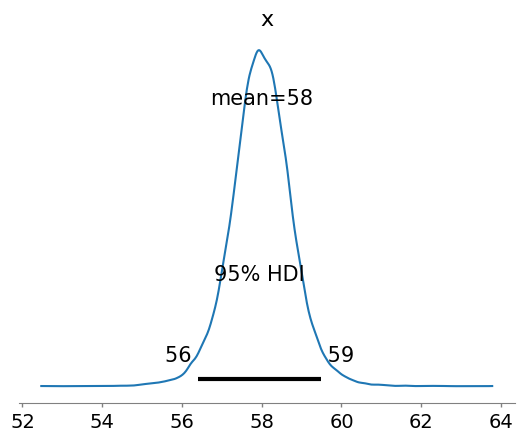

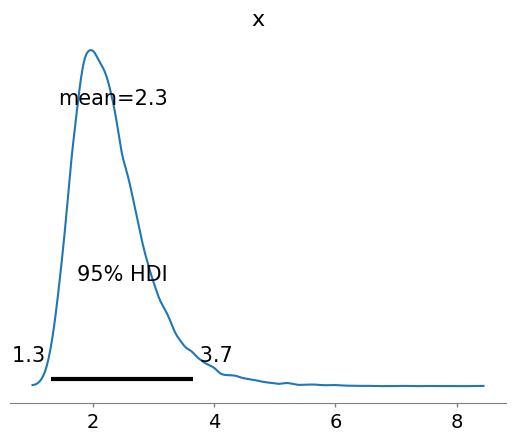

In [13]:
with model:
    # step = pm.Metropolis()
    trace = pm.sample(10_000, tune=5_000, return_inferencedata=False)
    
hdi_mu, hdi_sigma = trace['mu'], trace['sigma']

az.plot_posterior(trace['mu'], hdi_prob=0.95)
az.plot_posterior(trace['sigma'], hdi_prob=0.95)